# protostars
## 08- `Star_BB.py` experiment 3
### I. Run01

Re-run `Starfish` with the `Star_BB.py` code with the solid angle adjustment.

In [1]:
import pandas as pd

In [2]:
ws = np.load("../sf/exp3/output/bb_absolute/run01/emcee_chain.npy")

This took 194 minutes:

In [3]:
194.0/60

3.2333333333333334

Not bad!

In [4]:
burned = ws[:, -1000:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [5]:
from matplotlib.ticker import MaxNLocator

In [6]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{BB}}$", r"$\log{\Omega_2}$", r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

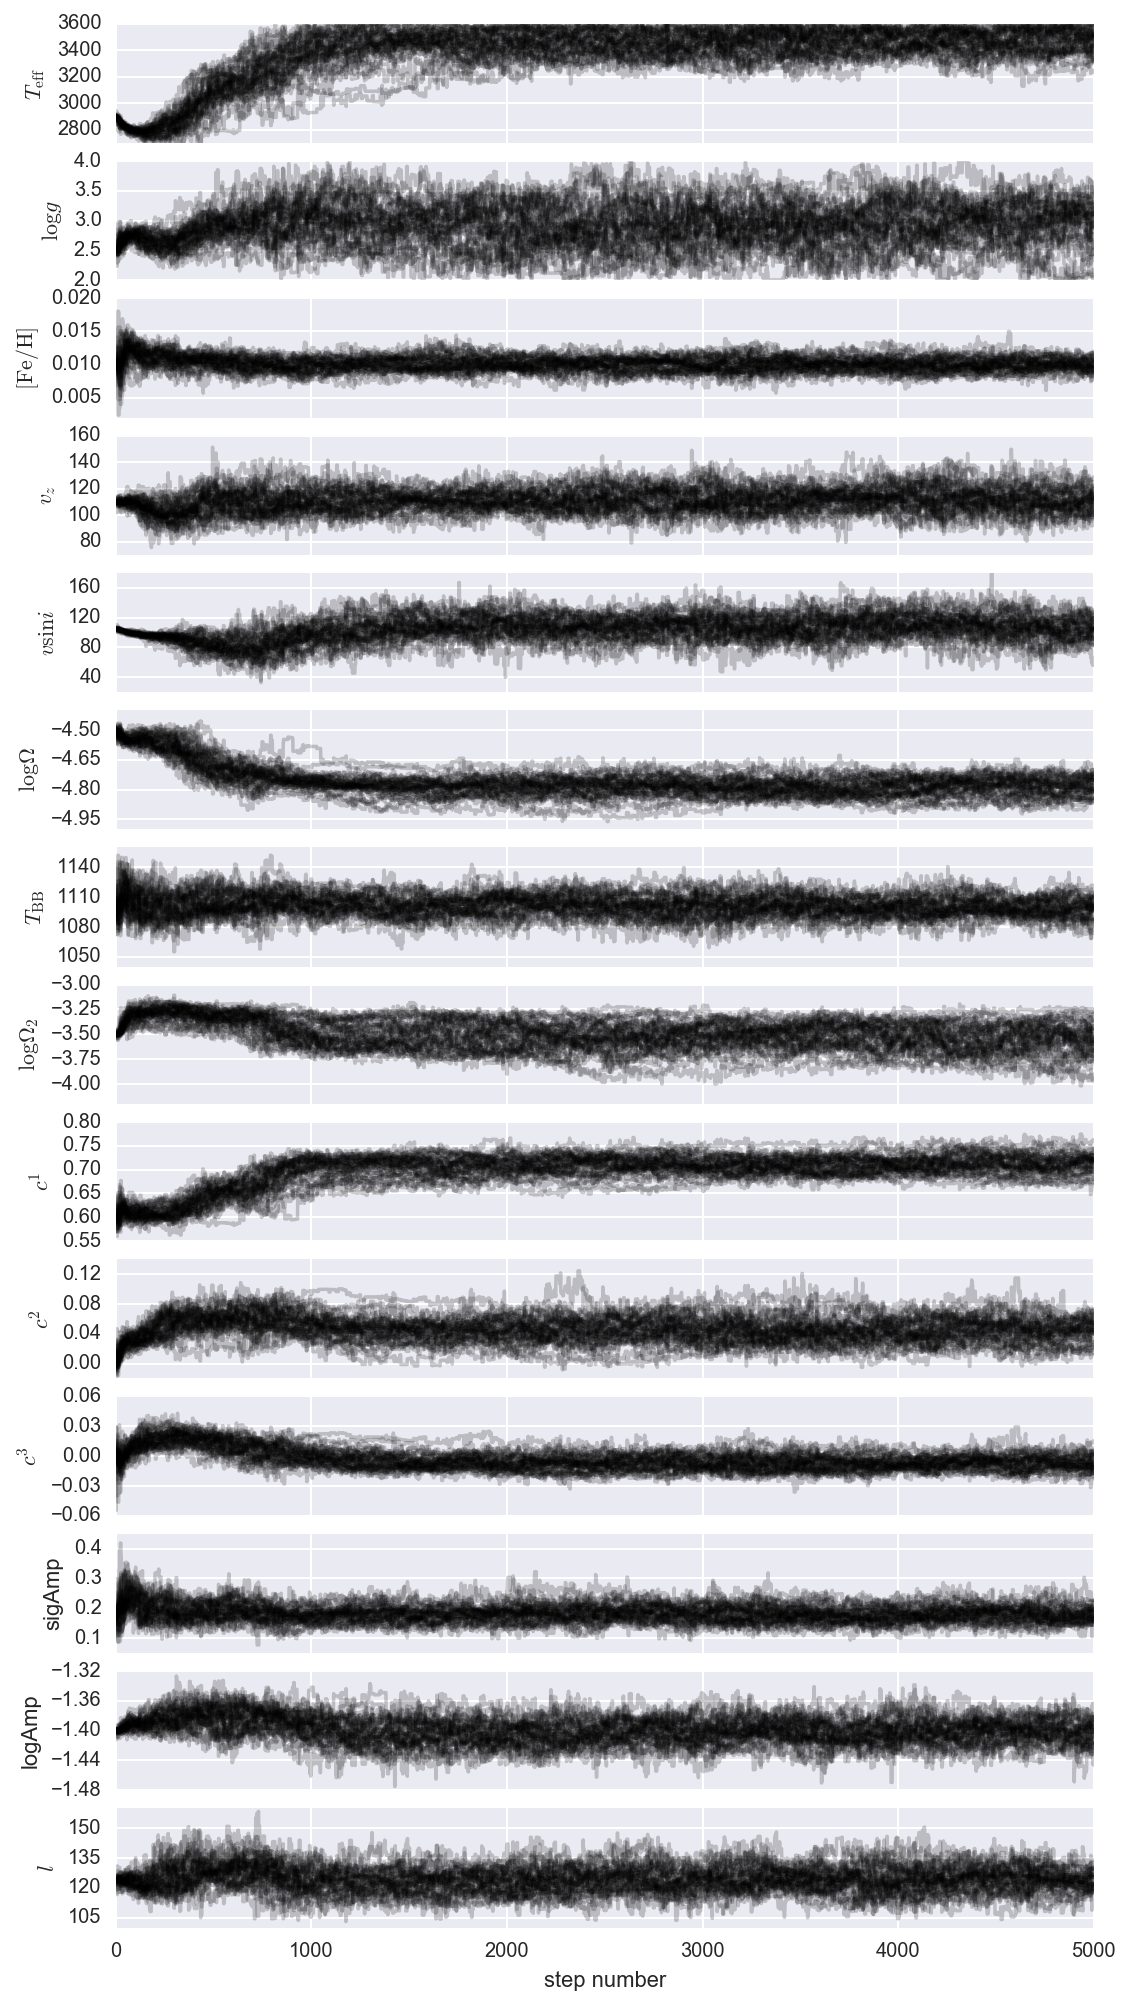

In [7]:
fig, axes = plt.subplots(14, 1, sharex=True, figsize=(8, 14))
for i in range(0, 14, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[13].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

In [8]:
ws.shape

(40, 5000, 14)

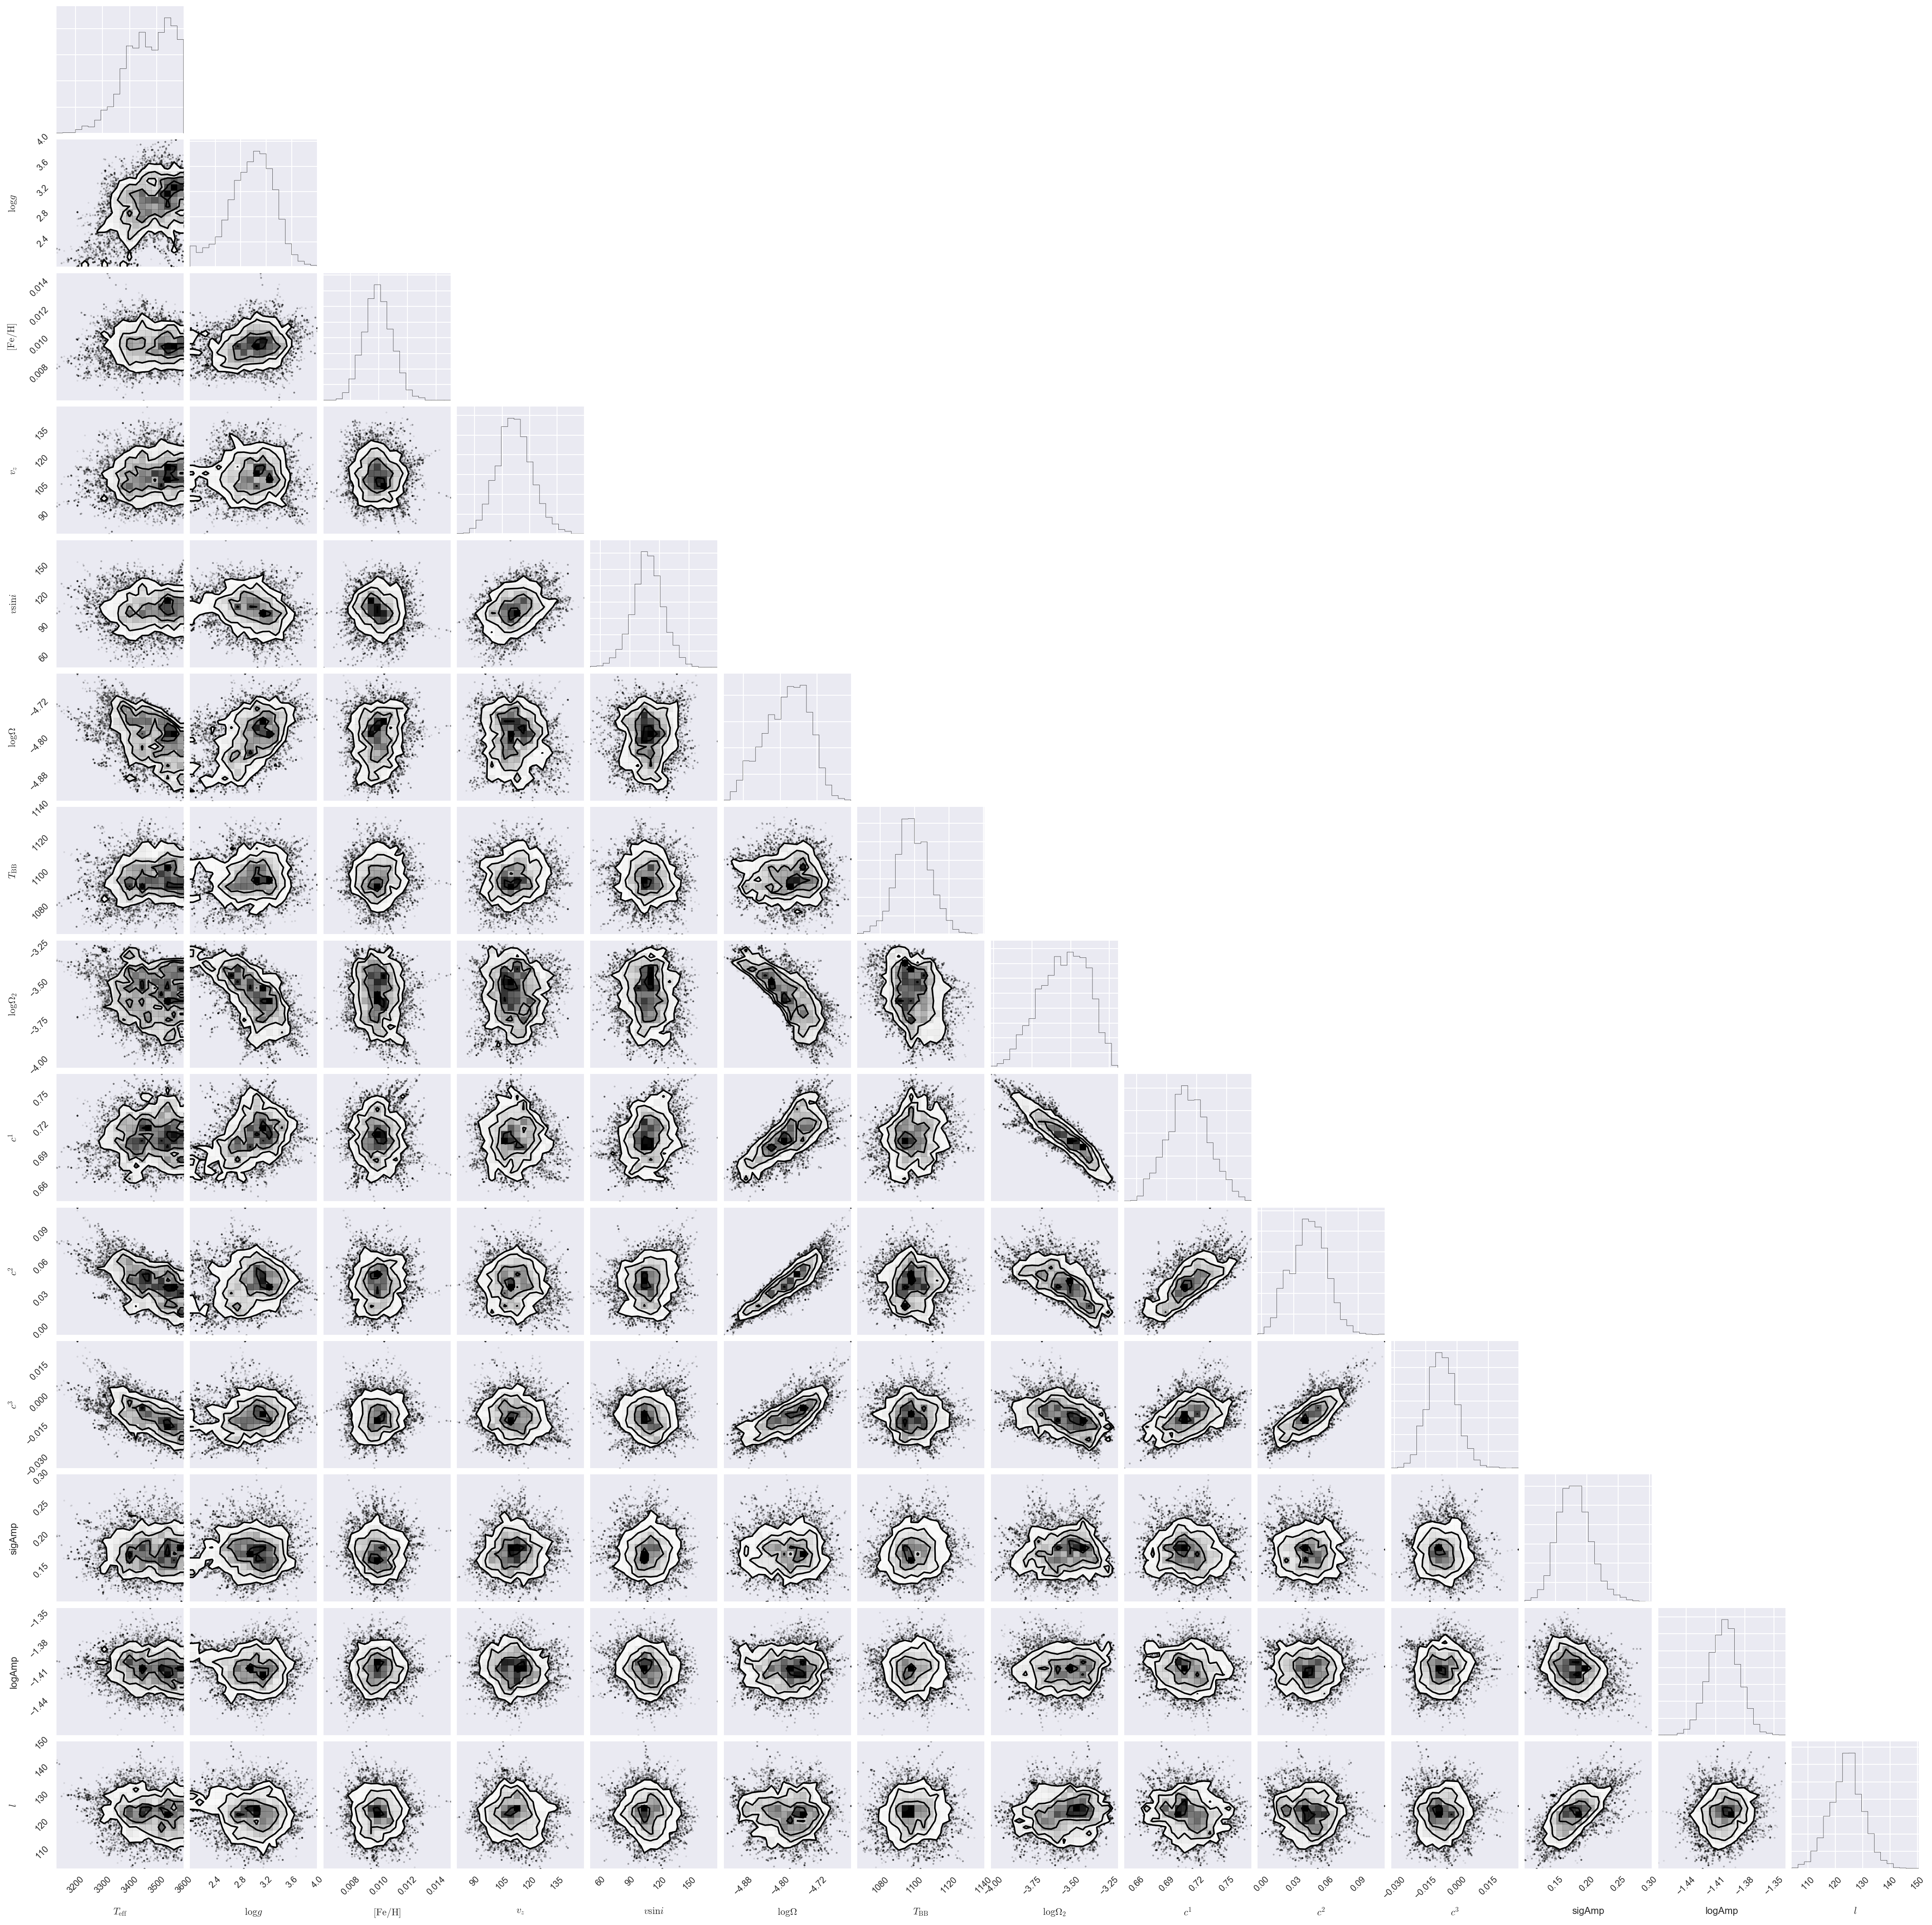

In [9]:
import corner
fig = corner.corner(fc, labels=label)
fig.savefig('../plots/exp3_run01_corner.png', dpi=300)

Spectra

In [10]:
draws = pd.read_csv('../sf/exp1/output/veil1/run01/models_ff-05_50_95.csv')

In [11]:
sns.set_context('notebook')

In [12]:
raw_mods = np.load('../sf/exp3/output/bb_absolute/run01/raw_models.npy', mmap_mode='r')

In [13]:
raw_mods.shape

(5000, 40, 4, 936)

In [14]:
i=4900
star, disk, cheb, flux_mean = raw_mods[i,0,0,:], raw_mods[i,0,1,:], raw_mods[i,0,2,:], raw_mods[i,0,3,:]

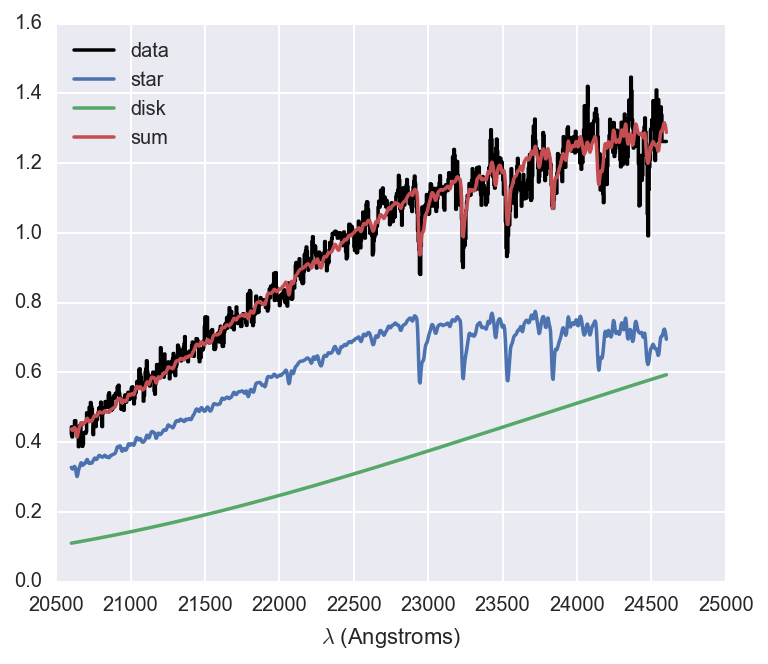

In [15]:
plt.figure(figsize=(6, 5))
plt.step(draws.wl, draws.data, 'k')
plt.plot(draws.wl, star, label = 'star')
plt.plot(draws.wl, disk, label = 'disk')
plt.plot(draws.wl, star+disk, label = 'sum')
plt.xlabel('$\lambda$ (Angstroms)')
#plt.ylim(0,1.6)
plt.legend(loc='best')

In [16]:
fc.shape

(40000, 14)

Compute the ratio of solid angles of disk to star:  
## $\frac{\Omega_d}{\Omega_\star} = \frac{r_d^2 d^2}{r_\star^2 d^2} = \frac{r_d^2}{r_\star^2}$

In [17]:
om_ratio = 10**fc[:, 7]/10**fc[:, 5]

In [18]:
om_ratio

array([ 41.46581813,  41.46581813,  41.46581813, ...,   5.59672054,
         5.59672054,   5.59672054])

/anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


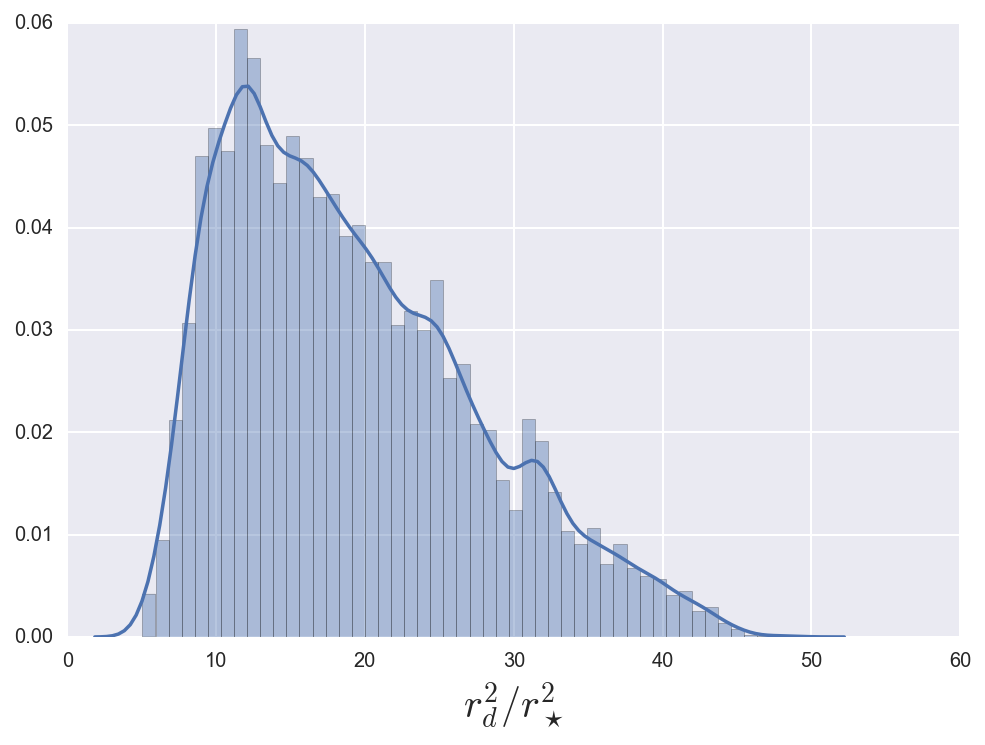

In [19]:
sns.distplot(om_ratio)
plt.xlabel(r'$r_d^2/r_\star^2$', fontsize=20)

In [20]:
sns.set_style('ticks')

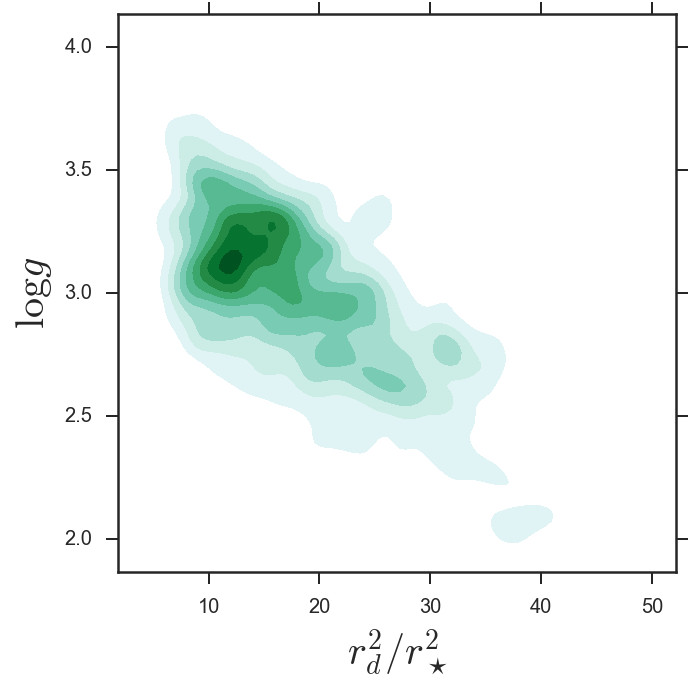

In [21]:
plt.figure(figsize=(5,5))
sns.kdeplot(om_ratio, fc[:,1], shade=True, shade_lowest=False)
plt.xlabel(r'$r_d^2/r_\star^2$', fontsize=20)
plt.ylabel(r'$\log{g}$', fontsize=20)

$g = GM/r_\star^2$